In [16]:
import datetime
import string
import random

import pandas as pd
import sqlite3

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
def load_dataframe():
    con = sqlite3.connect("../data/global_urban_building_completeness.gpkg")
    query = f"""
        select
            a.urban_center_id 
            --,b.gini 
            --,b.moran 
            --,b.spatial_proximity
            ,b."label" as cluster_label
            ,100*a.prediction_osm_completeness_2022 as "2022"
            ,100*a.prediction_osm_completeness_2021 as "2021"
            ,100*a.prediction_osm_completeness_2020 as "2020"
            ,100*a.prediction_osm_completeness_2019 as "2019"
            ,100*a.prediction_osm_completeness_2018 as "2018"             
            ,100*a.prediction_osm_completeness_2017 as "2017"
            ,100*a.prediction_osm_completeness_2016 as "2016"
            ,100*a.prediction_osm_completeness_2015 as "2015"
            ,100*a.prediction_osm_completeness_2014 as "2014"
            ,100*a.prediction_osm_completeness_2013 as "2013"
            ,100*a.prediction_osm_completeness_2012 as "2012"
            ,100*a.prediction_osm_completeness_2011 as "2011"
            ,100*a.prediction_osm_completeness_2010 as "2010"
            ,100*a.prediction_osm_completeness_2009 as "2009"
            ,100*a.prediction_osm_completeness_2008 as "2008"
        from rf_adjusted_prediction_reference_and_osm_urban_centers a
        left join intra_urban_completeness_stats_clusters b on
            a.urban_center_id = b.urban_center_id 
        order by a.urban_center_id
    """
    df = pd.read_sql_query(query, con=con)
    return df

In [3]:
df = load_dataframe()

In [4]:
display(df)

,urban_center_id,cluster_label,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
0,1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,33.944640,33.209961,32.568170,30.615076,30.489555,30.498214,28.133269,28.165859,24.412576,10.044055,0.346407,0.002894,0.000000,0.000000,0.0
3,4,2,97.694553,97.650951,96.666669,95.442194,21.541977,17.152178,16.610971,15.780404,14.991588,11.219409,3.073000,2.637581,2.123512,0.520402,0.0
4,5,2,103.729927,103.824743,103.246632,103.792059,19.212365,15.185764,12.971174,12.515948,11.946095,4.121134,3.875130,0.552584,0.039389,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13184,13185,1,43.089999,37.677194,33.481549,29.713058,26.889298,26.497356,26.715531,4.984794,4.684618,1.250272,1.230778,0.000000,0.000000,0.000000,0.0
13185,13186,None,27.230562,26.866434,26.866434,18.329350,18.329350,18.329350,18.329350,18.329350,18.329350,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
13186,13187,None,99.294800,95.706834,94.752391,52.857711,48.765702,46.854308,41.957058,38.910814,0.234385,0.234385,0.234385,0.234385,0.000000,0.000000,0.0
13187,13188,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.melt(
    id_vars=["cluster_label", "urban_center_id"], 
    var_name="year", 
    value_name="prediction_osm_completeness"
)

df["year"] = df["year"].apply(pd.to_datetime)
display(df)

,cluster_label,urban_center_id,year,prediction_osm_completeness
0,None,1,2022-01-01,NaN
1,None,2,2022-01-01,NaN
2,3,3,2022-01-01,33.944640
3,2,4,2022-01-01,97.694553
4,2,5,2022-01-01,103.729927
...,...,...,...,...
197830,1,13185,2008-01-01,0.000000
197831,None,13186,2008-01-01,0.000000
197832,None,13187,2008-01-01,0.000000
197833,None,13188,2008-01-01,NaN


/tmp/ipykernel_19789/1220293140.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[cluster_label])


0


/tmp/ipykernel_19789/1220293140.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[cluster_label])


1


/tmp/ipykernel_19789/1220293140.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[cluster_label])


2


/tmp/ipykernel_19789/1220293140.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[cluster_label])


3


/tmp/ipykernel_19789/1220293140.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[cluster_label])


4


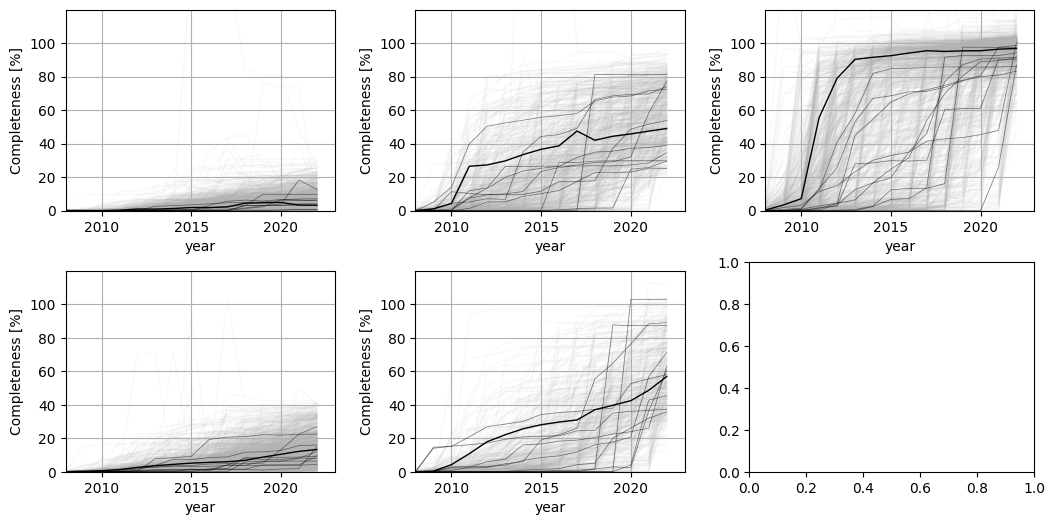

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(12.5, 6))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.3, hspace=0.3) # set the spacing between axes.

all_months = [
    datetime.date(2008, 1, 1),
    datetime.date(2009, 1, 1),
    datetime.date(2010, 1, 1),
    datetime.date(2011, 1, 1),
    datetime.date(2012, 1, 1),
    datetime.date(2013, 1, 1),
    datetime.date(2014, 1, 1),
    datetime.date(2015, 1, 1),
    datetime.date(2016, 1, 1),
    datetime.date(2017, 1, 1),
    datetime.date(2018, 1, 1),
    datetime.date(2019, 1, 1),
    datetime.date(2020, 1, 1),
    datetime.date(2021, 1, 1),
    datetime.date(2022, 1, 1)
]

urban_center_ids_selection = [
    996, # San Miguel de Tucumán
    3684, # Johannesburg
    4939,  # Tbilisi
    557,  # Minneapolis
    2054  # Paris
]  

df.dropna(inplace=True)

for cluster_label in range(0, 5):
    
    ax = plt.subplot(gs1[cluster_label])
    print(cluster_label)
    
    region_df = df.loc[df["cluster_label"] == str(cluster_label)]
    region_df.reset_index(inplace=True)
    
    urban_center_ids = region_df["urban_center_id"].to_list()
    
    #for urban_center_id in urban_center_ids:
    #    data_df = region_df.loc[region_df["urban_center_id"] == urban_center_id]
        
    sns.lineplot(
        data=region_df,
        x="year",
        y="prediction_osm_completeness",
        units="urban_center_id",
        alpha=0.075,
        estimator=None,
        color=".7",
        linewidth=1,
        ax=ax,
        legend=False,
    )
    
    sample_urban_centers = random.sample(urban_center_ids, 10)
    
    example_df = region_df.loc[region_df["urban_center_id"].isin(sample_urban_centers)]
    example_df.reset_index(inplace=True)
    sns.lineplot(
        data=example_df,
        x="year",
        y="prediction_osm_completeness",
        units="urban_center_id",
        estimator=None,
        alpha=0.5,
        legend=False,
        linewidth=0.5,
        color="black"
    )
    
    example_df = region_df.loc[region_df["urban_center_id"].isin(urban_center_ids_selection)]
    example_df.reset_index(inplace=True)
    
    sns.lineplot(
        data=example_df,
        x="year",
        y="prediction_osm_completeness",
        legend=False,
        linewidth=1.0,
        color="black"
    )
    
    ax.set_ylim([0, 120])
    ax.set_xlim([datetime.date(2008, 1, 1), datetime.date(2023, 1, 1)])
    ax.set_xticks([
        datetime.date(2010, 1, 1),
        datetime.date(2015, 1, 1),
        datetime.date(2020, 1, 1),
    ])
    ax.set_xticklabels(["2010", "2015", "2020"])
    ax.set_yticks([
        0, 20, 40, 60, 80, 100
    ])
    ax.set_ylabel("Completeness [%]")
    ax.grid()

plt.show()